<a href="https://colab.research.google.com/github/semishen/ML100Days/blob/master/Day_056_kmean_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)


In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

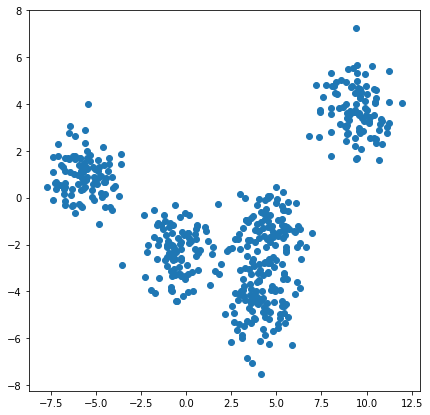

In [7]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:,0], X[:,1])
plt.show()
plt.close()

n_clusters: 2  | avg silhouette_score: 0.5027144446956527
n_clusters: 3  | avg silhouette_score: 0.6105565451092732
n_clusters: 4  | avg silhouette_score: 0.6270122040179333
n_clusters: 5  | avg silhouette_score: 0.6115749260799671
n_clusters: 6  | avg silhouette_score: 0.5500435519163975
n_clusters: 7  | avg silhouette_score: 0.47966952073336677
n_clusters: 8  | avg silhouette_score: 0.41102683537675766


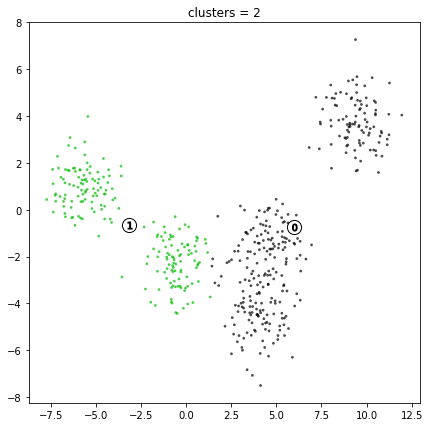

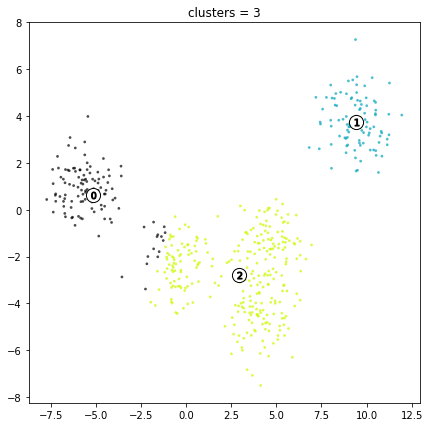

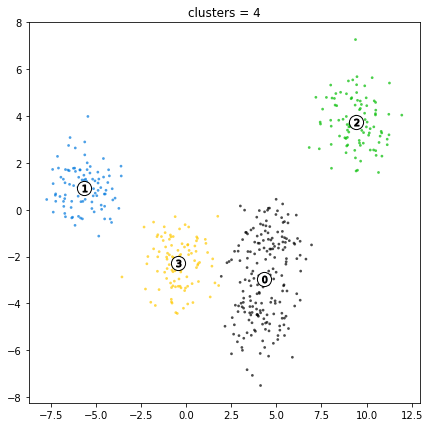

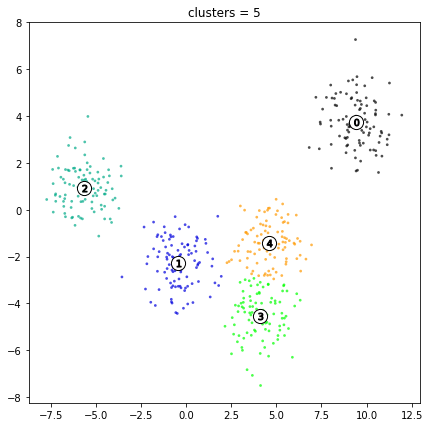

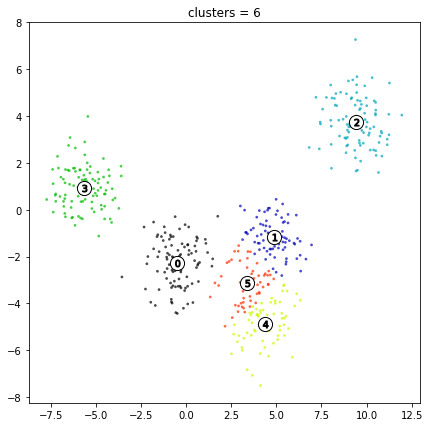

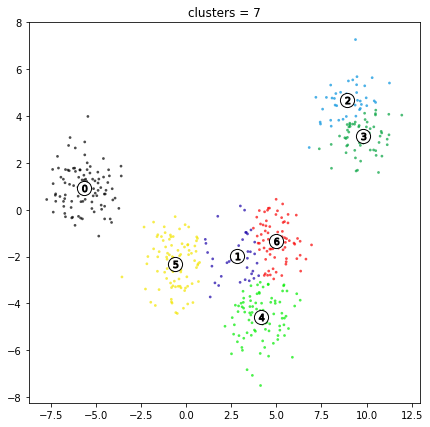

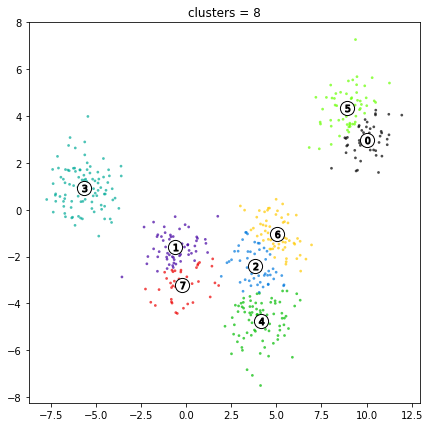

In [24]:
# 計算並繪製輪廓分析的結果
sil_scores = []
for n_cluster in range_n_clusters:
  fig, ax = plt.subplots(figsize=(7, 7))

  # compute kmeans
  kmeans = KMeans(n_clusters=n_cluster)
  predictions = kmeans.fit_predict(X)
  
  # compute avg silhouette scores
  silhouette_avg = silhouette_score(X, predictions)
  sil_scores.append( silhouette_avg)
  print("n_clusters:", n_cluster, " | avg silhouette_score:", silhouette_avg)

  # silhouette_score per sample
  sample_silhouette_values = silhouette_samples(X, predictions)

  colors = cm.nipy_spectral(predictions.astype(float) / n_cluster)
  ax.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')

  # add a marker on the center of cluster
  centers = kmeans.cluster_centers_
  ax.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax.set_title(f'clusters = {n_cluster}')



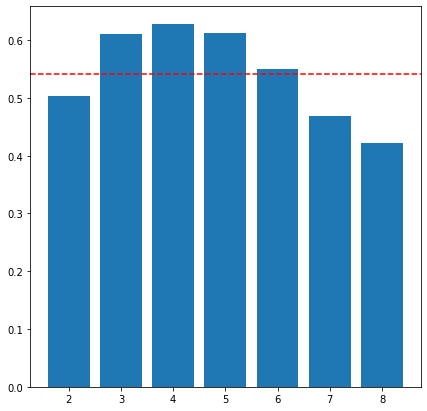

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(range_n_clusters, sil_scores)
ax.axhline(y=np.mean(sil_scores), color="red", linestyle="--")
plt.show()
plt.close()

### 根據相關結果 clusters = 3, 4, 5, 6的表現高於平均，若搭配散佈圖，clusters = 4, 5 的表現最好